# Lab 2: Advanced Circuits
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.

In [80]:
import numpy as np
from qiskit.opflow import I, X, Y, Z, MatrixEvolution, PauliTrotterEvolution
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit.compiler import transpile
import qc_grader



## II.1: Operators and Qiskit Opflow
In this notebook we will learn the fundamentals of Qiskit Opflow module, this has advanced features that aim to bridge the gap from quantum information theory to experiments. The Qiskit Opflow module will allow us to quickly enter the realm of quantum simulation. Quoting the Qiskit documentation: 

<em>"The Operator Flow is meant to serve as a lingua franca between the theory and implementation of Quantum Algorithms & Applications. Meaning, the ultimate goal is that when theorists speak their theory in the Operator Flow, they are speaking valid implementation, and when the engineers speak their implementation in the Operator Flow, they are speaking valid physical formalism."</em>

[Here](https://qiskit.org/documentation/tutorials/operators/01_operator_flow.html) you can find more documentation and examples on the module. To start, let's get familiar with how to define operators.

### 1.) Define Pauli operators for one qubit
Define operators for the four pauli matrices: `X`, `Y`, `Z`, `I`; and collect them in a list `pauli_list`.
  


In [81]:
# Define which will contain the Paulis
pauli_list = []

# Define Paulis and add them to the list
###INSERT CODE BELOW THIS LINE
pauli_list = [X, Y, Z, I]

###DO NOT EDIT BELOW THIS LINE

for pauli in pauli_list:
    print(pauli, '\n')


X 

Y 

Z 

I 



In [3]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex1

grade_lab2_ex1(pauli_list)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


There's a few operations that we can do on operators which are implemented in Qiskit Opflow. For example, we can rescale an operator by a scalar factor using `*`, we can compose operators using `@` and we can take the tensor product of operators using `^`. In the following, let us try to use these operations. Note that we need to be careful with the operations' precedences as python evaluates `+` before `^` and that may change the intended value of an expression. For example, `I^X+X^I` is actually interpreted as `I^(X+X)^I=2(I^X^I)`. Therefore the use of parenthesis is strongly recommended to avoid these types of errors. Also, keep in mind that the imaginary unit <em>i</em> is defined as `1j` in Python.


### 2.) Define the ladder operator: $\hat{\sigma}^{+} = \frac{ \hat{\sigma}_x + i \hat{\sigma}_y}{2}$ and $\hat{\sigma}^{-} = \frac{\hat{\sigma}_x - i \hat{\sigma}_y}{2}$

In [82]:
# Define list of ladder operators
ladder_operator_list = []

# Define ladder operators and add the to the list
###INSERT CODE BELOW THIS LINE

sig_plus = X+(1j*Y)
sig_minus = X-(1j*Y)

ladder_operator_list = [i/2 for i in [sig_plus, sig_minus]]


###DO NOT EDIT BELOW THIS LINE

for ladder_operator in ladder_operator_list:
    print(ladder_operator, '\n')


0.5 * X
+ 0.5j * Y 

0.5 * X
+ -0.5j * Y 



In [13]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex2

grade_lab2_ex2(ladder_operator_list)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


We can take the operators defined in Qiskit Opflow and translate them into other representation. For example the `to_matrix()` method of an Operator object allows us to retrieve the matrix representation of the operator (as a numpy array)

### 3.) Obtain the matrix representation of the pauli operators (`sigma_X`, `sigma_Y`, `sigma_Z` and `identity` )
Please submit the result as a list with the operators ordered as above.


In [83]:
# Define list which will contain the matrices representing the Pauli operators
matrix_sigma_list = []

# Add matrix representation of Paulis to the list
###INSERT CODE BELOW THIS LINE

# matrix_sigma_list.append(X.to_matrix())

for i in pauli_list:
    matrix_sigma_list.append(i.to_matrix())


###DO NOT EDIT BELOW THIS LINE

for matrix_sigma in matrix_sigma_list:
    print(matrix_sigma, '\n')

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]] 

[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]] 

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]] 

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] 



In [16]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex3

grade_lab2_ex3(matrix_sigma_list)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


We can also generate a circuit representation of the operator using the `to_circuit()` method

### 4.) Obtain the circuit representation of the pauli operators (`sigma_X`, `sigma_Y`, `sigma_Z` and `identity` )
Please submit the result as a list with the operators ordered as above.


In [84]:
# Define a list which will contain the circuit representation of the Paulis
circuit_sigma_list = []

# Add circuits to list
###INSERT CODE BELOW THIS LINE


for i in pauli_list:
    circuit_sigma_list.append(i.to_circuit())

###DO NOT EDIT BELOW THIS LINE

for circuit in circuit_sigma_list:
    print(circuit, '\n')



   ┌───┐
q: ┤ X ├
   └───┘ 

   ┌───┐
q: ┤ Y ├
   └───┘ 

   ┌───┐
q: ┤ Z ├
   └───┘ 

   
q: 
    



In [20]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex4

grade_lab2_ex4(circuit_sigma_list)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## II.2: Simulating Time-Evolution with Quantum Circuits

Now that we are a little more familiar with the syntax of the Qiskit Opflow module we can put this knowledge to use to build the first quantum circuit simulating the dynamics (or time-evolution) of a system described by a given Hamiltonian. As a first step, let us introduce parametrized circuits. Below we'll create a circuit with a parametrized rotation with an angle $\theta$. The goal is not to directly use parametrized rotations but to understand how Qiskit's quantum circuit can accept parameters whose values will be defined later on. We'll need that to create circuits that represent time-evolution operators with a parametrized value for the time.

### 1.) Create a circuit with a parametrized RX rotation of an angle $\theta$

   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘


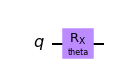

In [86]:
# Define a variable theta to be a parameter with name 'theta'
theta = Parameter('theta')
# Set number of qubits to 1
qubits_count = 1
# Initialize a quantum circuit with one qubit
qc = QuantumCircuit(qubits_count)

# Add a parametrized RX rotation on the qubit
###INSERT CODE BELOW THIS LINE

# theta = 30
qc.rx(theta, 0)


###DO NOT EDIT BELOW THIS LINE

print(qc)
qc.draw()

In [34]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex5

grade_lab2_ex5(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


This creates a circuit where the parameter of the RX gate is a placeholder which is waiting for a value. Once we decide on the value of $\theta$, we can bind it to the circuit using the `bind_parameters({parameter: parameter_value})` method of the `QuantumCircuit` object.

### 2.) Bind numerical value of the angle $\theta$

In [87]:
# Set the value of the parameter
theta_value = np.pi
# print(theta)
# Bind the value to the parametrized circuit
###INSERT CODE BELOW THIS LINE

# qc = QuantumCircuit(qubits_count)
# theta = Parameter('theta')
# qc.rx(theta, 0)

# print(qc)   # BEFORE DECIDE
qc = qc.bind_parameters({theta : theta_value})

###DO NOT EDIT BELOW THIS LINE

print(qc)

   ┌───────┐
q: ┤ Rx(π) ├
   └───────┘


In [135]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex6

grade_lab2_ex6(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Let us start to prepare the building blocks we'll need to calculate the time-evolution of a quantum system using a quantum computer. First let's define the Hamiltonian of the system to be the Heisenberg Hamiltonian for two qubits:

$$ \hat{H} = \frac{1}{2} \left( \hat{I}\otimes \hat{I} +  \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y + \hat{\sigma}_z \otimes \hat{\sigma}_z \right) $$

### 3.) Define the Heisenberg Hamiltonian using Qiskit Opflow

In [88]:
# Use the formula above to define the Hamiltonian operator
###INSERT CODE BELOW THIS LINE


### THIS IS ALSO CORRECT SOLUTION
H = (I^I) + (X^X) + (Y^Y) + (Z^Z)
H = 0.5*H

'''
# ORDER MATTERS ... 
# MAKE EXACT H AS GIVEN IN THE QUESTION

H = 0
for i in pauli_list:
    H += 0.5*(i^i)
# H = 0.5*H
'''
###DO NOT EDIT BELOW THIS LINE

# Get its matrix representation
H_matrix = H.to_matrix()

print(H_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [76]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex7

grade_lab2_ex7(H_matrix)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Next, let's create a quantum circuit for time evolution! We'll parametrize the time `t` with a Qiskit `Parameter` and exponentiate the Heisenberg Hamiltonian with the Qiskit Opflow method `exp_i()` which implements the corressponding time-evolution operator $e^{-i \hat{H} t}$

### 4.) Define the time evolution operator for the Heisenberg Hamiltonian $\hat{H}$ and the time step $t$

In [139]:
# Define a parameter t for the time in the time evolution operator
t = Parameter('t')

# Follow the instructions above to define a time-evolution operator
###INSERT CODE BELOW THIS LINE

time_evolution_operator = (H*t).exp_i()


###DO NOT EDIT BELOW THIS LINE

print(time_evolution_operator)

e^(-i*1.0*t * (
  0.5 * II
  + 0.5 * XX
  + 0.5 * YY
  + 0.5 * ZZ
))


In [78]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex8

grade_lab2_ex8(time_evolution_operator)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


We can then generate a circuit which implements the necessary operations that compute the time-evolution operator for a given evolution time. First, let's try to do this exactly with the `MatrxEvolution` class of Qiskit Opflow.

### 5.) Use `MatrixEvolution` to calculate the exact exponentiation at time $t$

*Hint: First you'll need to instantiate a `MatrixEvolution()` object. This object has a method called `convert(operator)` which takes a time-evolution operator and generates a quantum circuit implementing the operation. Finally, you'll need to bind the value of the evolution time to the circuit.

In [147]:
# Set a total time for the time evolution
evolution_time = 0.5

# Instantiate a MatrixEvolution() object to convert the time evolution operator
#  and bind the value for the time parameter
### INSERT CODE BELOW THIS LINE
evo_t = evolution_time

t_op = time_evolution_operator
# print(t_op)
# t_op = t_op.
m_evol = MatrixEvolution()

converted = m_evol.convert(t_op).bind_parameters({t : evo_t})
bound_matrix_exponentiation_circuit = converted 
###DO NOT EDIT BELOW THIS LINE

print(bound_matrix_exponentiation_circuit)

Evolved Hamiltonian is not composed of only MatrixOps, converting to Matrix representation, which can be expensive.


     ┌──────────────┐
q_0: ┤0             ├
     │  Hamiltonian │
q_1: ┤1             ├
     └──────────────┘


In [144]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex9

grade_lab2_ex9(bound_matrix_exponentiation_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


As a last step, let us also generate the circuit corresponding to the time-evolution operator calculated using the Trotter-Suzuki decomposition. For this we'll use the `PauliTrotterEvolution` class in the same way we've used the  `MatrixEvolution()` one.

### 6.) Use `PauliTrotterEvolution` to calculate the approximate exponentiation for a small time step

In [145]:
# Define a value for the duration of the time-step
time_step_value = 0.1

# Instantiate a PauliTrotterEvolution() object and convert the time-evolution operator
# to then bind the value of the time step
###INSERT CODE BELOW THIS LINE

t_step_val = time_step_value
pt_evo = PauliTrotterEvolution()

print(t_op)

converted = pt_evo.convert(t_op).bind_parameters({t:t_step_val})


bound_trotter_exponentiation_circuit = converted

###DO NOT EDIT BELOW THIS LINE

print(bound_trotter_exponentiation_circuit)

e^(-i*1.0*t * (
  0.5 * II
  + 0.5 * XX
  + 0.5 * YY
  + 0.5 * ZZ
))
     ┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │  exp(-it (II + XX + YY + ZZ))(0.1) │
q_1: ┤1                                   ├
     └────────────────────────────────────┘


In [146]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex10

grade_lab2_ex10(bound_trotter_exponentiation_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


The full evolution can then be obtained by putting together several Trotter steps up to the desired evolution time. For each Trotter step you can compose the single-step Trotter using the `@` operator.

### 7.) Concatenate several Trotter steps to generate the desired evolution

In [184]:
# Define the number of steps needed to reach the previously set total time-evolution
steps = int(evolution_time/time_step_value)

# Compose the operator for a Trotter step several times to generate the 
# operator for the full time-evolution
###INSERT CODE BELOW THIS LINE

print(t_op)

converted = pt_evo.convert(t_op)
big = converted.bind_parameters({t : t_step_val})

print(converted)
print("---"*10)
print(big)
print("---"*10)

for i in range(1, steps):
    big @= converted.bind_parameters({t: t_step_val})
    
# converted = converted.bind_parameters({t : evo_t})

total_time_evolution_circuit = big
###DO NOT EDIT BELOW THIS LINE

print(total_time_evolution_circuit)


e^(-i*1.0*t * (
  0.5 * II
  + 0.5 * XX
  + 0.5 * YY
  + 0.5 * ZZ
))
     ┌──────────────────────────────────────┐
q_0: ┤0                                     ├
     │  exp(-it (II + XX + YY + ZZ))(1.0*t) │
q_1: ┤1                                     ├
     └──────────────────────────────────────┘
------------------------------
     ┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │  exp(-it (II + XX + YY + ZZ))(0.1) │
q_1: ┤1                                   ├
     └────────────────────────────────────┘
------------------------------
     ┌────────────────────────────────────┐»
q_0: ┤0                                   ├»
     │  exp(-it (II + XX + YY + ZZ))(0.1) │»
q_1: ┤1                                   ├»
     └────────────────────────────────────┘»
«     ┌────────────────────────────────────┐»
«q_0: ┤0                                   ├»
«     │  exp(-it (II + XX + YY + ZZ))(0.1) │»
«q_1: ┤1                                   ├»
«     └───

In [185]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex11

grade_lab2_ex11(total_time_evolution_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Consider now a system of three qubits initially in the $\vert 001 \rangle$ state, whose evolution is determined by the tight binding Hamiltonian 

$$\hat{H} = \sum_{i=0}^{1} \hat{\sigma}_x^{(i)} \hat{\sigma}_x^{(i+1)}  + \sum_{i=0}^{1} \hat{\sigma}_y^{(i)} \hat{\sigma}_y^{(i+1)} $$

Determine the final state at time $t=2$ by evolving the initial state with the time-evolution operator generated by the tight binding Hamiltonian. You can proceed in a similar way as the previous exercises, be careful to compose the circuit for the state preparation and for the time evolution correctly. Note that you should define the Hamiltonian operator exactly as the definition above to get the right aswer for the grader.

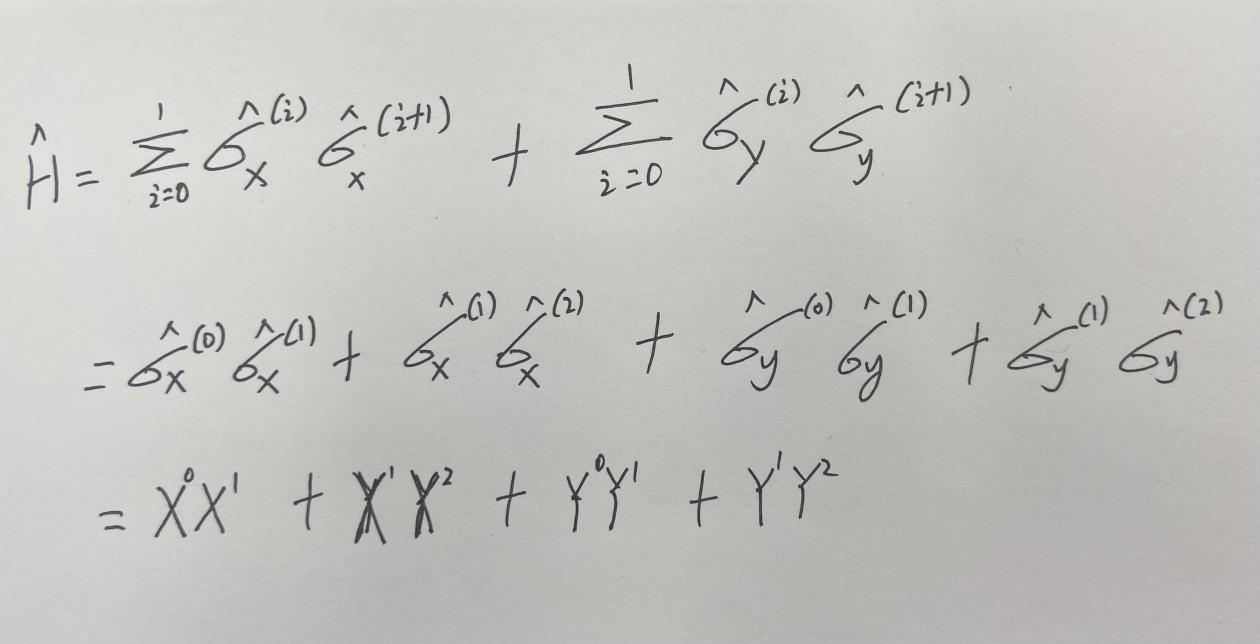

NOTE : ordering is not correct, remember 001 initial state corresponds to qubit2 qubit1 qubit0 since qiskit takes qubit ordering from right to left

### 8.) Construct the circuit for preparing an initial state and evolving it under the tight binding Hamiltonian

In [215]:
# Set number of qubits
num_qubits = 3
# Define time parameter
t = Parameter('t')
# Set total evolution time
evolution_time_t = 2
# Set size of time-step for Trotter evolution
time_step_value_t = 0.1
# Define the number of steps
steps_t = int(evolution_time_t/time_step_value_t)
# Create circuit
tight_binding_circuit = QuantumCircuit(num_qubits)
# Add initial state preparation
tight_binding_circuit.x(0)


# Define the Hamiltonian, the time-evolution operator, the Trotter step and the total evolution
###INSERT CODE BELOW THIS LINE
tc = tight_binding_circuit
# tight_binding_circuit.draw()
print(tc)

H = (I^X^X) + (X^X^I) + (I^Y^Y) + (Y^Y^I)

print(H)

t_op = (t*H).exp_i()

print(t_op)

converted = pt_evo.convert(t_op).bind_parameters({t : time_step_value_t}).to_circuit()

big = tc+converted
print(big)

for i in range(1, steps_t):
    big += converted
    
# print(big)
print("-----"*15)

full_time_evolution_circuit = big
###DO NOT EDIT BELOW THIS LINE

print(full_time_evolution_circuit)



     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
1.0 * IXX
+ 1.0 * XXI
+ 1.0 * IYY
+ 1.0 * YYI
e^(-i*1.0*t * (
  1.0 * IXX
  + 1.0 * XXI
  + 1.0 * IYY
  + 1.0 * YYI
))
     ┌───┐┌────────────────────────────────────────┐
q_0: ┤ X ├┤0                                       ├
     └───┘│                                        │
q_1: ─────┤1 exp(-it (IXX + XXI + IYY + YYI))(0.1) ├
          │                                        │
q_2: ─────┤2                                       ├
          └────────────────────────────────────────┘
---------------------------------------------------------------------------
     ┌───┐┌────────────────────────────────────────┐»
q_0: ┤ X ├┤0                                       ├»
     └───┘│                                        │»
q_1: ─────┤1 exp(-it (IXX + XXI + IYY + YYI))(0.1) ├»
          │                                        │»
q_2: ─────┤2                                       ├»
          └──────────────────────

In [216]:
from qc_grader.challenges.qgss_2022 import grade_lab2_ex12

grade_lab2_ex12(full_time_evolution_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
